## About the dataset

###### This dataset contains the locations of Article 28, Article 36, Article 40, and Article 7 health care facilities and programs from the Health Facilities Information System (HFIS)

###### Article 28 facilities are hospitals, nursing homes, diagnostic treatment centers and midwifery birth centers.
###### Article 36 facilities are certified home health care agencies, licensed home care services agencies, and long term home health care programs.
###### Article 40 facilities are hospices.
###### Article 7 are licensed adult care facilities.

###### The dataset currently only contains the locations of hospitals and hospital extension clinics. The data for the remaining facility types will be added in the future.

###### Data set link: https://health.data.ny.gov/Health/Health-Facility-General-Information/vn5v-hh5r/about_data

## Step1: Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
pd.set_option('display.max_columns', 39)
pd.set_option('display.max_rows', 6119)

## Step2: Loading the dataset

In [2]:
df=pd.read_csv("Health_Facility_General_Information_20240908.csv")

In [3]:
df.head()# printing first 5 rows from the dataset

,Facility ID,Facility Name,Short Description,Description,Facility Open Date,Facility Address 1,Facility Address 2,Facility City,Facility State,Facility Zip Code,Facility Phone Number,Facility Fax Number,Facility Website,Facility County Code,Facility County,Regional Office ID,Regional Office,Main Site Name,Main Site Facility ID,Operating Certificate Number,Operator Name,Operator Address 1,Operator Address 2,Operator City,Operator State,Operator Zip Code,Cooperator Name,Cooperator Address,Cooperator Address 2,Cooperator City,Cooperator State,Cooperator Zip Code,Ownership Type,Facility Latitude,Facility Longitude,Facility Location
0,124,Elcor Nursing and Rehabilitation Center,NH,Residential Health Care Facility - SNF,02/01/1989,48 Colonial Drive,NaN,Horseheads,New York,14845,6.077390e+09,6.077961e+09,NaN,7,Chemung,2,Western Regional Office - Rochester,NaN,NaN,0722304N,"Elcor Operating Company, LLC",300 Gleed Avenue,NaN,East Aurora,New York,14052,NaN,NaN,NaN,NaN,New York,NaN,LLC,42.162086,-76.854225,"(42.162086, -76.854225)"
1,738,ConnextCare,DTC,Diagnostic and Treatment Center,01/01/1901,61 Delano Street,NaN,Pulaski,New York,13142,3.152987e+09,NaN,NaN,37,Oswego,3,Central New York Regional Office,NaN,NaN,3726201R,Northern Oswego County Health Services Inc,61 Delano Street,NaN,Pulaski,New York,13142,NaN,NaN,NaN,NaN,New York,NaN,Not for Profit Corporation,NaN,NaN,NaN
2,743,Chestnut Park Rehabilitation and Nursing Center,NH,Residential Health Care Facility - SNF,08/01/1980,330 Chestnut Street,NaN,Oneonta,New York,13820,6.074329e+09,NaN,NaN,38,Otsego,4,Capital District Regional Office,NaN,NaN,3801304N,"ORNC, LLC",1 Hillcrest Center Drive,Suite 225,Spring Valley,New York,10977,NaN,NaN,Suite 225,NaN,New York,NaN,LLC,42.452911,-75.085541,"(42.452911, -75.085541)"
3,1005,Glens Falls Hospital,HOSP,Hospital,01/01/1901,100 Park Street,NaN,Glens Falls,New York,12801,5.189261e+09,NaN,NaN,56,Warren,4,Capital District Regional Office,NaN,NaN,5601000H,Glens Falls Hospital Inc,100 Park Street,NaN,Glens Falls,New York,12801,Albany Med Health System,New Scotland Avenue,NaN,Albany,New York,12208.0,Not for Profit Corporation,43.307350,-73.645996,"(43.30735, -73.645996)"
4,1630,Long Island Jewish Medical Center,HOSP,Hospital,01/01/1901,270-05 76th Avenue,NaN,New Hyde Park,New York,11040,7.184708e+09,NaN,NaN,7096,Queens,5,Metropolitan Area Regional Office - New York City,NaN,NaN,7003004H,Long Island Jewish Medical Center,270-05 76 Avenue,NaN,New Hyde Park,New York,11040,"Northwell Quality and Medical Affairs, Inc.",2000 Marcus Ave.,NaN,New Hyde Park,New York,11042.0,Not for Profit Corporation,NaN,NaN,NaN


## Step3: Understanding and Cleaning the dataset

In [4]:
df.shape # shows number of rows and columns

(6119, 36)

In [5]:
df.columns# shows all the columns in our dataset

Index(['Facility ID', 'Facility Name', 'Short Description', 'Description',
       'Facility Open Date', 'Facility Address 1', 'Facility Address 2',
       'Facility City', 'Facility State', 'Facility Zip Code',
       'Facility Phone Number', 'Facility Fax Number', 'Facility Website',
       'Facility County Code', 'Facility County', 'Regional Office ID',
       'Regional Office', 'Main Site Name', 'Main Site Facility ID',
       'Operating Certificate Number', 'Operator Name', 'Operator Address 1',
       'Operator Address 2', 'Operator City', 'Operator State',
       'Operator Zip Code', 'Cooperator Name', 'Cooperator Address',
       'Cooperator Address 2', 'Cooperator City', 'Cooperator State',
       'Cooperator Zip Code', 'Ownership Type', 'Facility Latitude',
       'Facility Longitude', 'Facility Location'],
      dtype='object')

In [6]:
df.dtypes # Display the datatype of each columns in the dataset

Facility ID                       int64
Facility Name                    object
Short Description                object
Description                      object
Facility Open Date               object
Facility Address 1               object
Facility Address 2               object
Facility City                    object
Facility State                   object
Facility Zip Code                object
Facility Phone Number           float64
Facility Fax Number             float64
Facility Website                 object
Facility County Code              int64
Facility County                  object
Regional Office ID                int64
Regional Office                  object
Main Site Name                   object
Main Site Facility ID           float64
Operating Certificate Number     object
Operator Name                    object
Operator Address 1               object
Operator Address 2               object
Operator City                    object
Operator State                   object


In [7]:
df.info() # Shows datatype,Number of columns and rows,Name of the columns,Number of non null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6119 entries, 0 to 6118
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Facility ID                   6119 non-null   int64  
 1   Facility Name                 6119 non-null   object 
 2   Short Description             5802 non-null   object 
 3   Description                   6119 non-null   object 
 4   Facility Open Date            6119 non-null   object 
 5   Facility Address 1            6119 non-null   object 
 6   Facility Address 2            673 non-null    object 
 7   Facility City                 6119 non-null   object 
 8   Facility State                6119 non-null   object 
 9   Facility Zip Code             6119 non-null   object 
 10  Facility Phone Number         5227 non-null   float64
 11  Facility Fax Number           2700 non-null   float64
 12  Facility Website              724 non-null    object 
 13  Fac

In [8]:
df.describe()# gives the 5 number summary,mean,STD of numberical data 

,Facility ID,Facility Phone Number,Facility Fax Number,Facility County Code,Regional Office ID,Main Site Facility ID,Cooperator Zip Code,Facility Latitude,Facility Longitude
count,6119.000000,5.227000e+03,2.700000e+03,6119.000000,6119.000000,2567.000000,1124.000000,5381.000000,5381.000000
mean,8984.746200,6.084838e+09,6.274918e+09,2558.747344,4.405132,2480.807947,14246.145018,41.717414,-74.801552
std,4816.578415,1.922170e+09,1.860878e+09,3385.570496,1.721196,3249.399773,8612.705691,1.113533,1.672438
min,1.000000,2.012454e+09,2.069844e+09,1.000000,1.000000,1.000000,5401.000000,40.516773,-79.629898
25%,5634.000000,5.182348e+09,5.184324e+09,28.000000,3.000000,563.000000,10701.000000,40.749821,-75.605316
50%,9629.000000,6.316329e+09,6.463302e+09,51.000000,5.000000,1169.000000,12208.000000,41.031301,-73.954582
75%,13353.500000,7.186337e+09,7.187493e+09,7094.000000,5.000000,3136.000000,14203.000000,42.867303,-73.815475
max,15659.000000,9.789223e+09,9.738593e+09,7097.000000,7.000000,15620.000000,48152.000000,44.978494,-72.169997


In [9]:
df.isnull().sum() #Display the number of null values for each column

Facility ID                        0
Facility Name                      0
Short Description                317
Description                        0
Facility Open Date                 0
Facility Address 1                 0
Facility Address 2              5446
Facility City                      0
Facility State                     0
Facility Zip Code                  0
Facility Phone Number            892
Facility Fax Number             3419
Facility Website                5395
Facility County Code               0
Facility County                    0
Regional Office ID                 0
Regional Office                    0
Main Site Name                  3552
Main Site Facility ID           3552
Operating Certificate Number       0
Operator Name                      0
Operator Address 1                 0
Operator Address 2              5457
Operator City                      0
Operator State                     0
Operator Zip Code                  0
Cooperator Name                 4995
C

## Handling Missing Values

## Observation:
Facility Address 2 (5446 missing out of 6119),Operator Address 2 (5457 missing), Facility Fax Number (3419 missing), Facility Website (5395 missing), Main Site Facility ID (3552 missing), Main Site Name (3552 missing), Cooperator Name (4995 missing), Cooperator Address (4995 missing), Cooperator Address 2 (5457 missing), Cooperator City (4995 missing), Cooperator Zip Code (4995 missing): More than half of the values are missing

Columns with more than 50% missing values often lack sufficient data to provide meaningful insights.
Moreover, retaining such columns can introduce noise and complexity without adding value to the analysis.

In [10]:
# Dropping columns with high percentage of missing values
df_cleaned = df.drop(columns=[
    'Facility Address 2', 'Facility Fax Number', 'Facility Website', 
    'Main Site Name', 'Main Site Facility ID', 
    'Operator Address 2', 'Cooperator Name', 'Cooperator Address', 
    'Cooperator Address 2', 'Cooperator City', 'Cooperator Zip Code'
],inplace=True)

In [11]:
df['Facility Phone Number'] = df['Facility Phone Number'].astype('object').fillna('No Phone Provided')

In [12]:
df.dropna(subset=['Facility Latitude', 'Facility Longitude', 'Facility Location'],inplace=True)

In [13]:
# Keeping rows where 'Short Description' has null values in a new DataFrame
null_rows_df = df[df['Short Description'].isnull()]

# Printing the 'Short Description' and 'Description' columns for the rows with null 'Short Description'
print(null_rows_df[['Short Description', 'Description']].head(5))

# Extracting unique values from 'Description' where 'Short Description' is null
unique_descriptions = null_rows_df['Description'].unique()

# Printing the unique descriptions
print("\nUnique values in 'Description' for rows with null 'Short Description':")
print(unique_descriptions)

    Short Description                                        Description
14                NaN  School Based Diagnostic and Treatment Center E...
55                NaN  Primary Care Hospital - Critical Access Hospit...
59                NaN  School Based Diagnostic and Treatment Center E...
97                NaN  School Based Diagnostic and Treatment Center E...
151               NaN  School Based Diagnostic and Treatment Center E...

Unique values in 'Description' for rows with null 'Short Description':
['School Based Diagnostic and Treatment Center Extension Clinic'
 'Primary Care Hospital - Critical Access Hospital Extension Clinic'
 'Primary Care Hospital - Critical Access Hospital'
 'Mobile Hospital Extension Clinic'
 'Mobile Diagnostic and Treatment Center Extension Clinic'
 'School Based Primary Care Hospital - Critical Access Extension Clinic'
 'Off-Campus Emergency Department']


In [14]:
# Define the mapping of descriptions to their respective short descriptions
description_mapping = {
    'School Based Diagnostic and Treatment Center Extension Clinic': 'SBDTCE',
    'Mobile Hospital Extension Clinic': 'MHEC',
    'Primary Care Hospital - Critical Access Hospital Extension Clinic': 'PCH-CAHEC',
    'Primary Care Hospital - Critical Access Hospital': 'PCH-CAH',
    'Mobile Diagnostic and Treatment Center Extension Clinic': 'MDTCE',
    'School Based Primary Care Hospital - Critical Access Extension Clinic': 'SBPCH-CAEC',
    'Off-Campus Emergency Department': 'OCED'
}

# Fill null values in 'Short Description' based on 'Description' using the mapping
# This operation modifies the DataFrame in place
df.fillna({'Short Description': df['Description'].map(description_mapping)}, inplace=True)


## Standardizing dates

In [15]:
# Converting 'facility_open_date' to a standard 'YYYY-MM-DD' format
df['Facility Open Date '] = pd.to_datetime(df['Facility Open Date'], format='%m/%d/%Y')

## Converting incorrect data types

In [16]:
# Converting 'facility_phone_number' to object (string) since they are not numerical
df['Facility Phone Number'] = df['Facility Phone Number'].astype(str)
# Ensure 'facility_zip_code' and 'operator_zip_code' are strings as zip codes are not used for calculation
df['Facility Zip Code'] = df['Facility Zip Code'].astype(str)
df['Operator Zip Code'] = df['Operator Zip Code'].astype(str)

## Step4: EDA

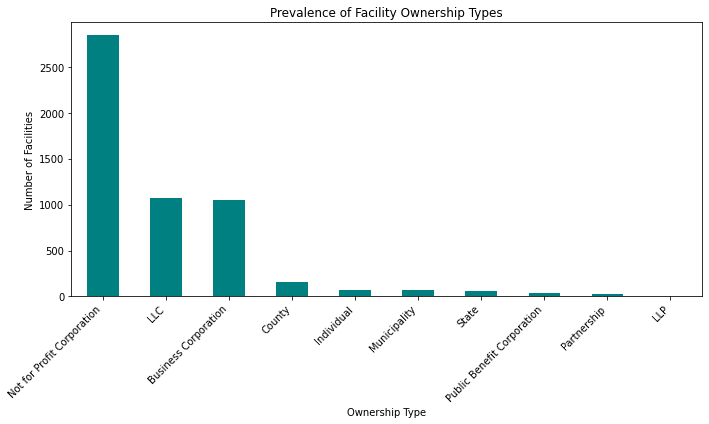

In [17]:
# Plotting the distribution of ownership types
ownership_counts = df['Ownership Type'].value_counts()
# Visualizing the ownership type counts
plt.figure(figsize=(10,6))
ownership_counts.plot(kind='bar', color='teal')
plt.title('Prevalence of Facility Ownership Types')
plt.ylabel('Number of Facilities')
plt.xlabel('Ownership Type')
plt.xticks(rotation=45, ha='right')  # Rotate the labels and adjust alignment to prevent overlap
plt.tight_layout()
plt.show()


## Observation

The most common ownership type is "Not for Profit Corporation", with over 3,100 facilities. This suggests that non-profit ownership is dominant in this dataset.
Business Corporations and LLCs are also prevalent, each with around 1,200–1,300 facilities.
Other forms of ownership, such as County, Municipality, State, and Public Benefit Corporation, have significantly fewer facilities, indicating that public or government-run ownership is less common.
Individual and Partnership ownerships are relatively rare

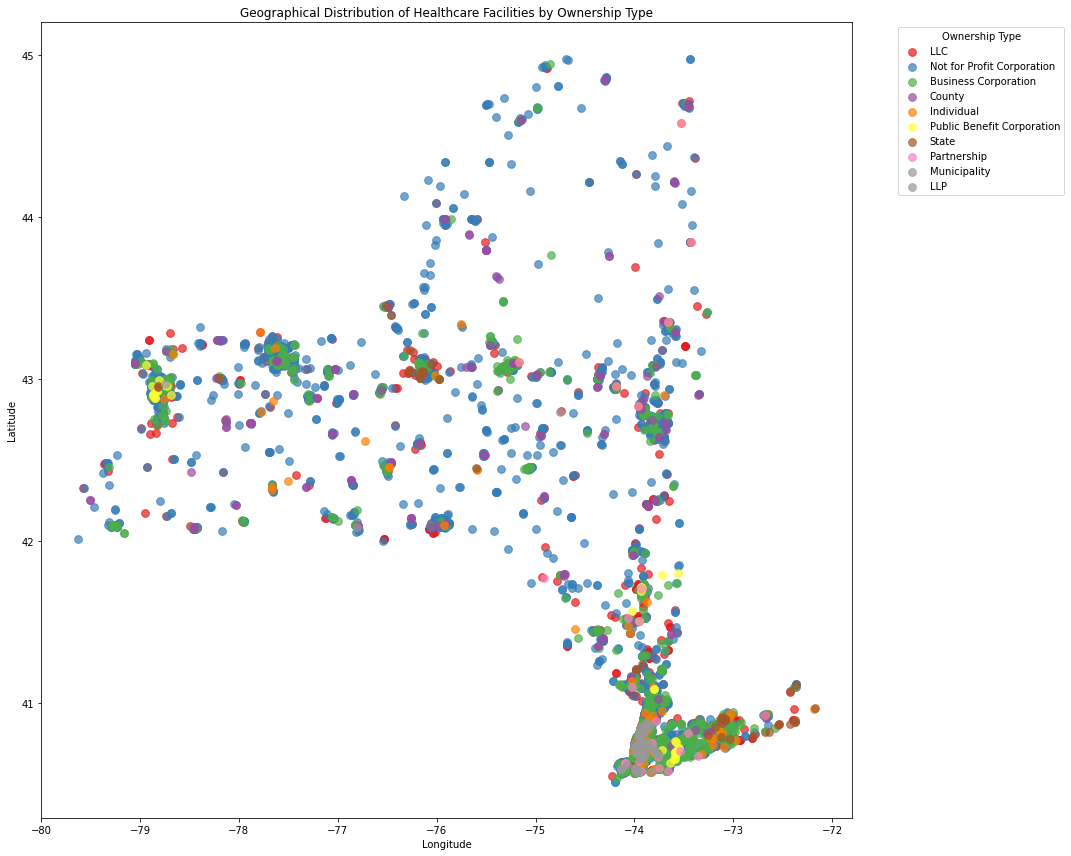

In [18]:
# Get unique ownership types
ownership_types = df['Ownership Type'].unique()

# Plot each facility with color corresponding to its ownership type
plt.figure(figsize=(15, 12))

# Define color map for different ownership types
colors = plt.get_cmap('Set1')

# Loop through each ownership type and plot the corresponding facilities
for i, ownership_type in enumerate(ownership_types):
    subset = df[df['Ownership Type'] == ownership_type]
    lats = subset['Facility Latitude'].astype(float)
    lons = subset['Facility Longitude'].astype(float)
    plt.scatter(lons, lats, label=ownership_type, color=colors(i), marker='o', alpha=0.7, s=60)

plt.title('Geographical Distribution of Healthcare Facilities by Ownership Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Ownership Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Observation

##### Concentration of Facilities in Certain Areas:
The majority of the healthcare facilities seem to be concentrated along the eastern part of the state

##### Ownership Types Across Regions:
Not for Profit Corporations are widely distributed across urban and rural areas, playing a major role in healthcare provision.


LLCs and Business Corporations are more concentrated in urban and suburban areas, reflecting a business-driven focus in populated regions.


County and State-run facilities are less frequent and often located in rural areas, suggesting public ownership supports regions less appealing to private operators.

##### Overlap of Ownership Types in Urban Centers:
In urban centers, there is significant overlap among different ownership types, with facilities of various ownership types located close to each other. This suggests competitive or complementary healthcare markets in cities, where different types of healthcare ownership serve various population needs.

##### Public vs. Private Facilities:

There is a distinct difference between the geographic spread of public facilities (county, state) versus private ones (LLC, Business Corporation). Public facilities tend to be less concentrated in densely populated areas, whereas private ownership is more dominant in high-density urban regions.

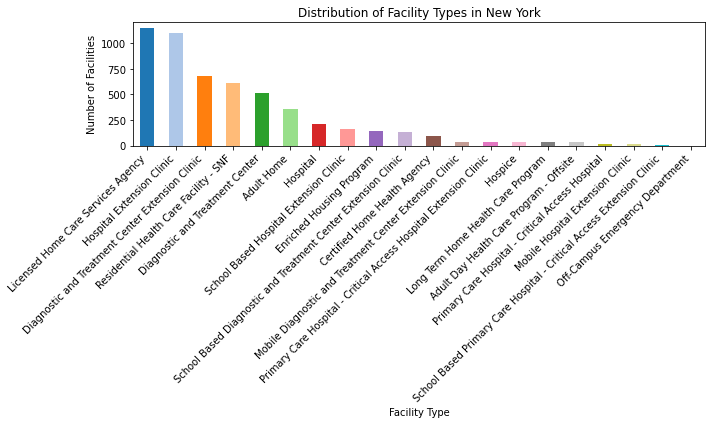

In [19]:
# Plotting the distribution of facility types
facility_type_counts = df['Description'].value_counts()
colors = plt.cm.tab20.colors  # Using tab20 colormap for distinct colors

plt.figure(figsize=(10, 6))
facility_type_counts.plot(kind='bar', color=colors[:len(facility_type_counts)])  # Assigning different colors to each bar
plt.title('Distribution of Facility Types in New York')
plt.xlabel('Facility Type')
plt.ylabel('Number of Facilities')
plt.xlabel('Facility Type')
plt.ylabel('Number of Facilities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### Dominance of Certain Facility Types:

Some facility types, such as hospitals and nursing homes, are more prevalent, suggesting that these are core components of the healthcare infrastructure in New York.
##### Variety of Specialized Services:

While hospitals dominate, there are also notable numbers of other specialized facilities such as diagnostic and treatment centers and assisted living facilities, which cater to different patient needs.
##### Limited Presence of Facilities:

Certain specialized facility types, such as hospice centers or mental health clinics, have a smaller presence, indicating either a focused geographic distribution or potentially limited access across the state.


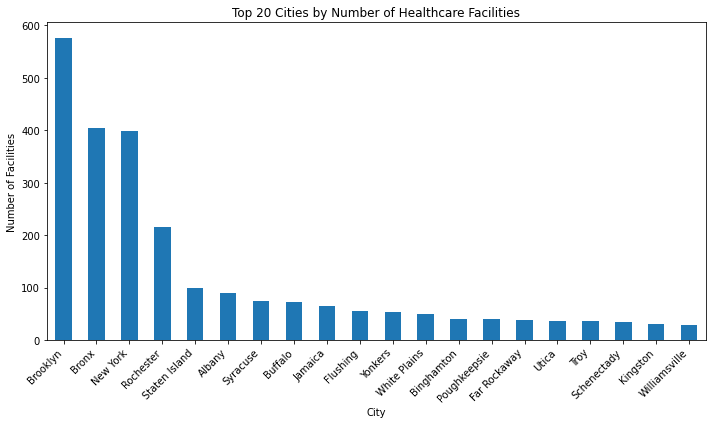

In [20]:
# Plotting the concentration of facilities by city
facility_city_counts = df['Facility City'].value_counts().head(20)  # Top 20 cities by facility count

plt.figure(figsize=(10, 6))
facility_city_counts.plot(kind='bar')
plt.title('Top 20 Cities by Number of Healthcare Facilities')
plt.xlabel('City')
plt.ylabel('Number of Facilities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


###### High Concentration in Major Cities:

The cities with the highest number of healthcare facilities tend to be larger, more populated urban areas, reflecting their need for more extensive healthcare infrastructure. Cities like New York City likely dominate due to the population density and diversity of healthcare services required.

##### Variations in Facility Numbers:

There is a clear variation in the number of facilities per city, with some cities having a significantly higher count, which may indicate a more comprehensive range of services or larger hospital systems.

<Figure size 1440x720 with 0 Axes>

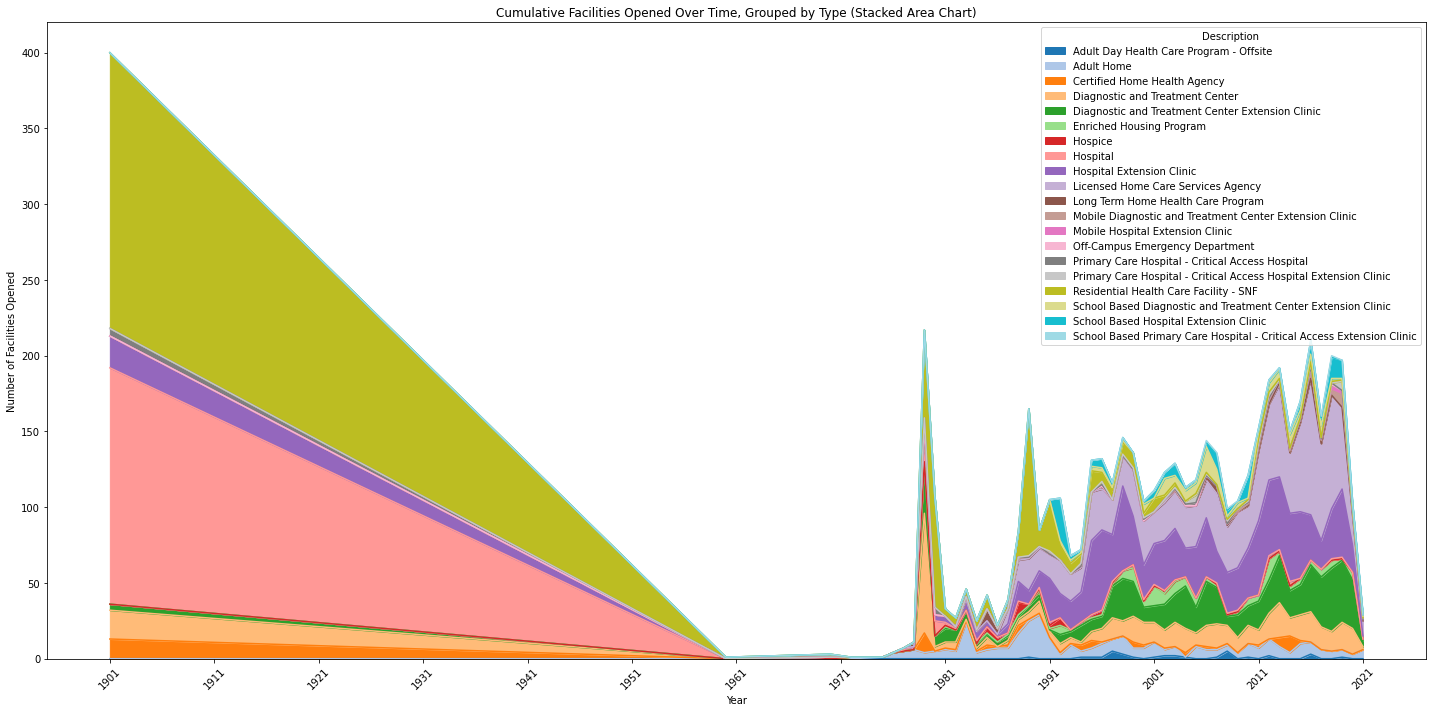

In [21]:
# Convert 'Facility Open Date' to datetime to ensure proper handling of date-related operations
df['Facility Open Date'] = pd.to_datetime(df['Facility Open Date'], errors='coerce')

# Extract the year of opening
df['Open Year'] = df['Facility Open Date'].dt.year

facility_openings_by_type = df.groupby(['Open Year', 'Description']).size().unstack()

plt.figure(figsize=(20, 10))
facility_openings_by_type.plot(kind='area', stacked=True, figsize=(20, 10), colormap='tab20')
plt.title('Cumulative Facilities Opened Over Time, Grouped by Type (Stacked Area Chart)')
plt.xlabel('Year')
plt.ylabel('Number of Facilities Opened')
plt.xticks(np.arange(min(df['Open Year'].dropna()), max(df['Open Year'].dropna()) + 1, 10), rotation=45)
plt.tight_layout()
plt.show()


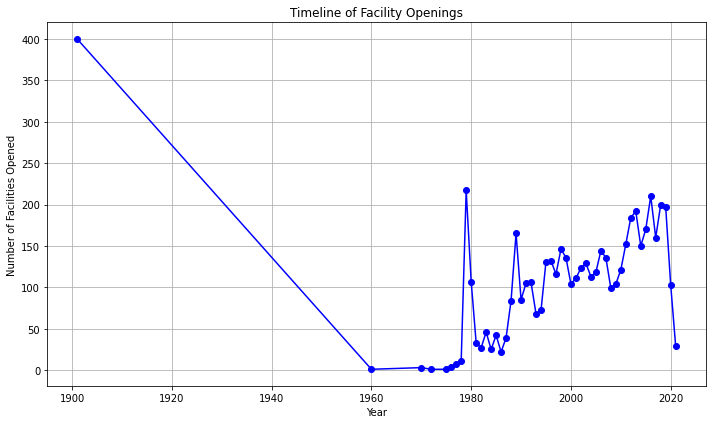

In [22]:
# Count the number of facilities opened each year
openings_by_year = df.groupby('Open Year').size()

# Plot the number of facilities opened over time
plt.figure(figsize=(10, 6))
openings_by_year.plot(kind='line', marker='o', color='blue')
plt.title('Timeline of Facility Openings')
plt.xlabel('Year')
plt.ylabel('Number of Facilities Opened')
plt.grid(True)
plt.tight_layout()
plt.show()


## Observation

The graph illustrates gradual growth, with huge peaks in the 1980s and 2000s due to investments in hospitals, nursing homes, and specialized services. In recent times, a fall in the numbers of opening facilities may indicate the market stabilization and consolidation that characterizes healthcare infrastructure.

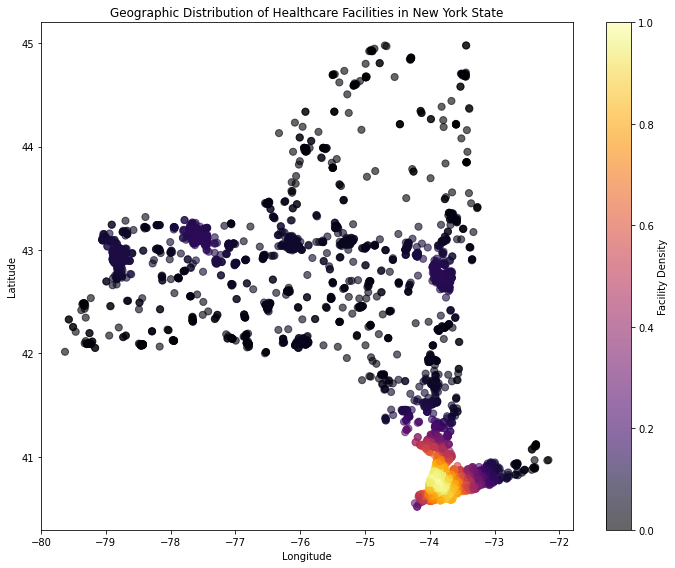

In [23]:

lats = df['Facility Latitude']
lons = df['Facility Longitude']
# Create heatmap data using Gaussian Kernel Density Estimate
xy = np.vstack([lons, lats])
kde = gaussian_kde(xy)(xy)

# Normalize the KDE values for better color scaling
kde_normalized = (kde - kde.min()) / (kde.max() - kde.min())

# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.scatter(lons, lats, c=kde_normalized, s=50, cmap='inferno', alpha=0.6)
plt.colorbar(label='Facility Density')
plt.title('Geographic Distribution of Healthcare Facilities in New York State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()


## Observation

Heat map showing the geographical distribution of healthcare facilities. The intensity of the color represents the density of facilities in different regions, with darker areas indicating a higher concentration of healthcare services

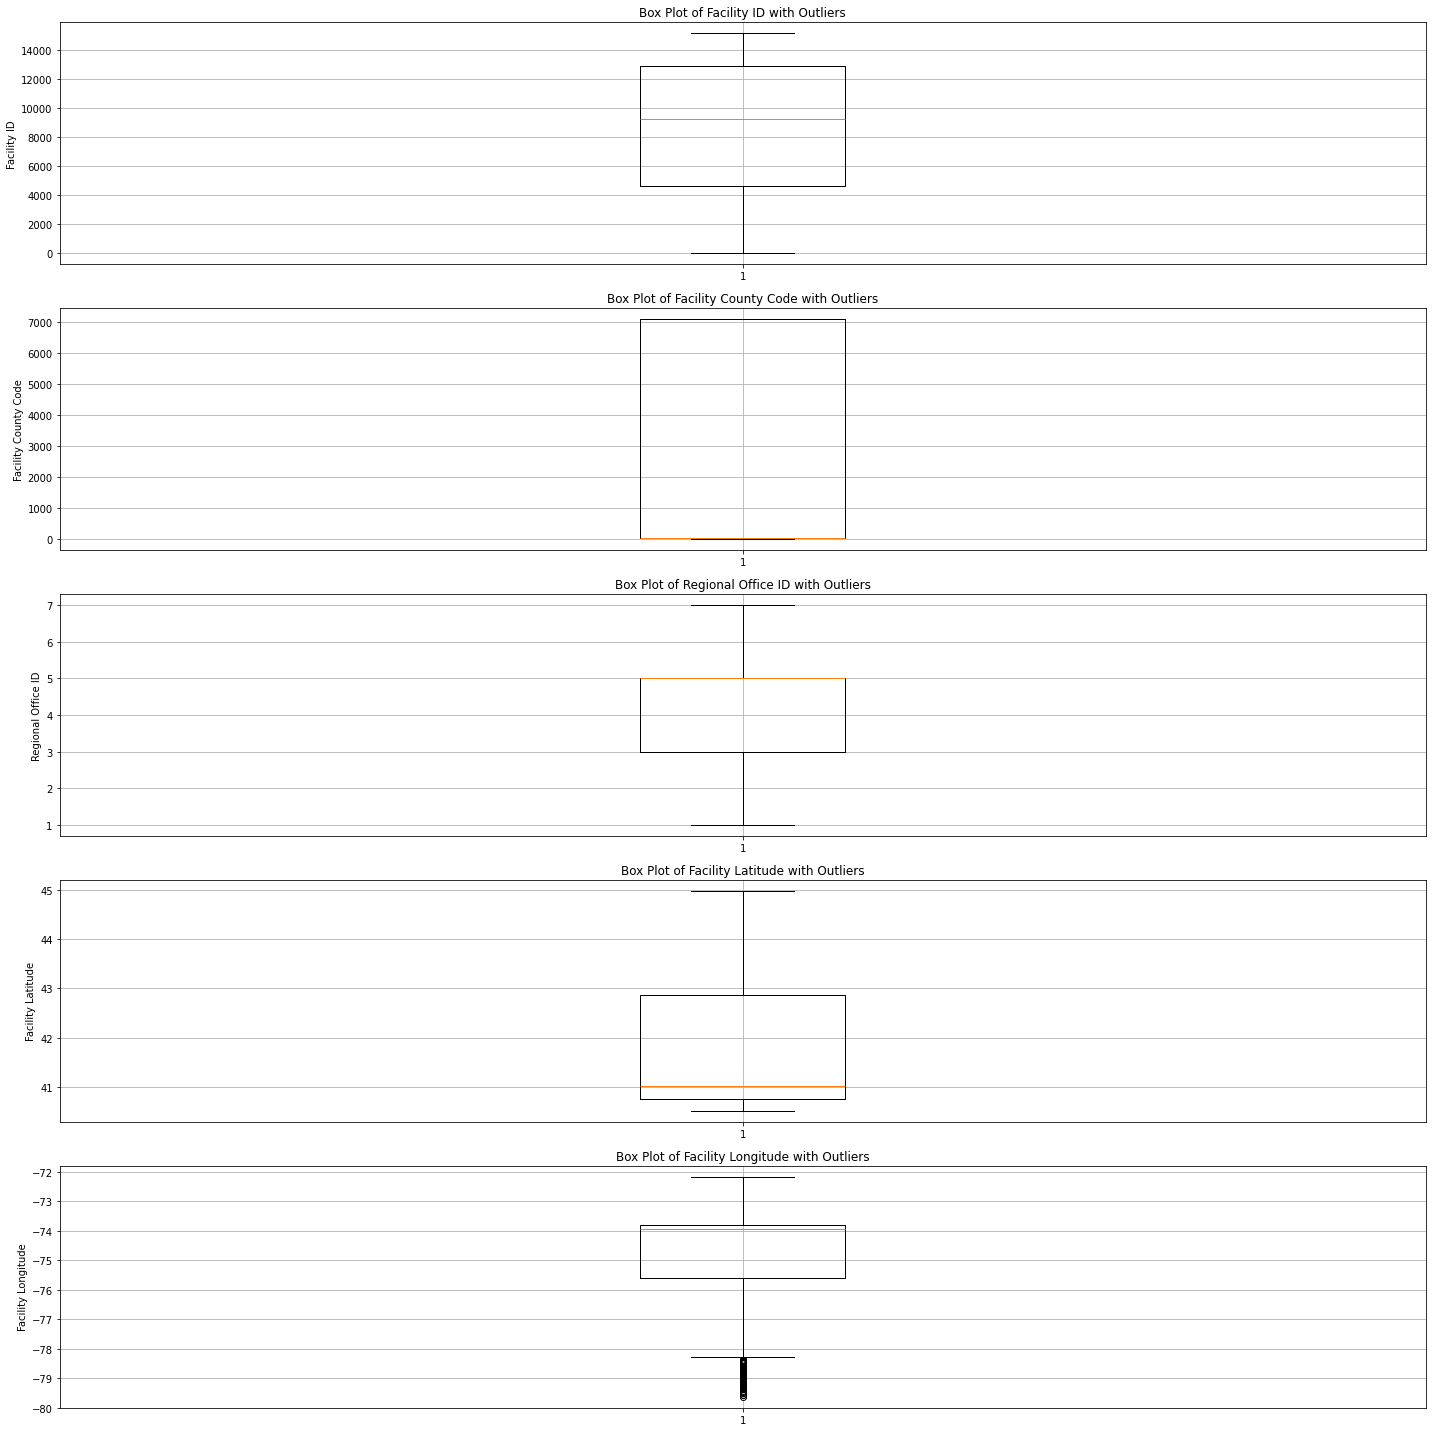

In [24]:
# Detect and visualize outliers for all numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Plotting the box plots for each numerical column to show outliers
plt.figure(figsize=(20, 20))

# Loop over numerical columns and create a subplot for each
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    plt.boxplot(df[column].dropna())
    plt.title(f'Box Plot of {column} with Outliers')
    plt.ylabel(column)
    plt.grid(True)

plt.tight_layout()
plt.show()
